In [1]:
from numpy import *
from matplotlib.pyplot import *

In [2]:
uc=0.25
def f(u):
    return u*(1-u)*(u-uc)

In [3]:
f(0.23)

-0.0035419999999999983

In [4]:
U=arange(-0.2,1.1,0.01)

In [5]:
U

array([-2.00000000e-01, -1.90000000e-01, -1.80000000e-01, -1.70000000e-01,
       -1.60000000e-01, -1.50000000e-01, -1.40000000e-01, -1.30000000e-01,
       -1.20000000e-01, -1.10000000e-01, -1.00000000e-01, -9.00000000e-02,
       -8.00000000e-02, -7.00000000e-02, -6.00000000e-02, -5.00000000e-02,
       -4.00000000e-02, -3.00000000e-02, -2.00000000e-02, -1.00000000e-02,
        1.66533454e-16,  1.00000000e-02,  2.00000000e-02,  3.00000000e-02,
        4.00000000e-02,  5.00000000e-02,  6.00000000e-02,  7.00000000e-02,
        8.00000000e-02,  9.00000000e-02,  1.00000000e-01,  1.10000000e-01,
        1.20000000e-01,  1.30000000e-01,  1.40000000e-01,  1.50000000e-01,
        1.60000000e-01,  1.70000000e-01,  1.80000000e-01,  1.90000000e-01,
        2.00000000e-01,  2.10000000e-01,  2.20000000e-01,  2.30000000e-01,
        2.40000000e-01,  2.50000000e-01,  2.60000000e-01,  2.70000000e-01,
        2.80000000e-01,  2.90000000e-01,  3.00000000e-01,  3.10000000e-01,
        3.20000000e-01,  

In [7]:
f(U)

array([ 1.08000000e-01,  9.94840000e-02,  9.13320000e-02,  8.35380000e-02,
        7.60960000e-02,  6.90000000e-02,  6.22440000e-02,  5.58220000e-02,
        4.97280000e-02,  4.39560000e-02,  3.85000000e-02,  3.33540000e-02,
        2.85120000e-02,  2.39680000e-02,  1.97160000e-02,  1.57500000e-02,
        1.20640000e-02,  8.65200000e-03,  5.50800000e-03,  2.62600000e-03,
       -4.16333634e-17, -2.37600000e-03, -4.50800000e-03, -6.40200000e-03,
       -8.06400000e-03, -9.50000000e-03, -1.07160000e-02, -1.17180000e-02,
       -1.25120000e-02, -1.31040000e-02, -1.35000000e-02, -1.37060000e-02,
       -1.37280000e-02, -1.35720000e-02, -1.32440000e-02, -1.27500000e-02,
       -1.20960000e-02, -1.12880000e-02, -1.03320000e-02, -9.23400000e-03,
       -8.00000000e-03, -6.63600000e-03, -5.14800000e-03, -3.54200000e-03,
       -1.82400000e-03,  7.28583860e-17,  1.92400000e-03,  3.94200000e-03,
        6.04800000e-03,  8.23600000e-03,  1.05000000e-02,  1.28340000e-02,
        1.52320000e-02,  

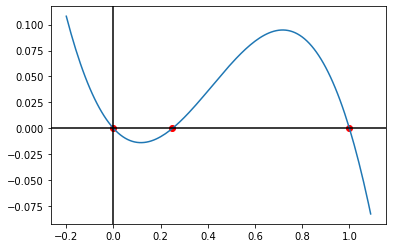

In [11]:
plot(U,f(U))
axhline(y=0,color='k')
axvline(x=0,color='k')
scatter([0,uc,1],[0,f(uc),f(1)],color='red')

In [12]:
def fv(u,v):
    return f(u)-v

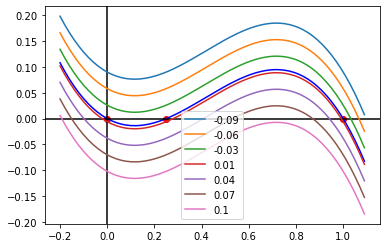

In [41]:
plot(U,f(U),color='b')
axhline(y=0,color='k')
axvline(x=0,color='k')
scatter([0,uc,1],[0,f(uc),f(1)],color='red')
for v in arange(-0.09,0.13,0.032):
    plot(U,fv(U,v),label=round(v,2))
    legend()
    #scatter([0,uc,1],[fv(0,v),fv(uc,v),fv(1,v)],color='red')

In [42]:
from scipy.integrate import odeint

In [51]:
epsilon=0.1
k=1.
def F(U,t):
    u,v=U
    return array([u*(u-uc)*(1-u)-v,epsilon*(k*u-v)])

In [64]:
T=linspace(-1,100,3000)

In [65]:
T

array([ -1.        ,  -0.96632211,  -0.93264421, ...,  99.93264421,
        99.96632211, 100.        ])

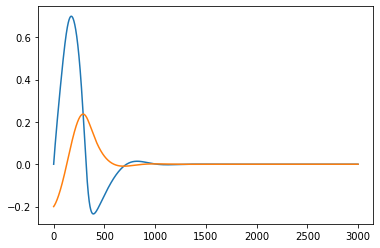

In [66]:
plot(odeint(F,[0,-0.2],T))

In [67]:
sol=odeint(F,[0,-0.2],T).T

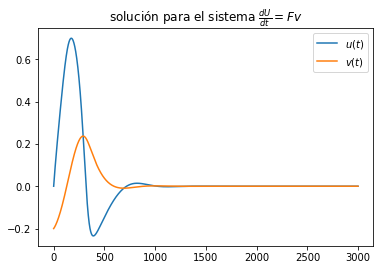

In [68]:
plot(sol[0],label=r'$u(t)$')
plot(sol[1],label=r'$v(t)$')
title(r'solución para el sistema $\frac{dU}{dt}=Fv$')
legend()

Text(0.5, 1.0, 'Plano Fase del sistema excitable')

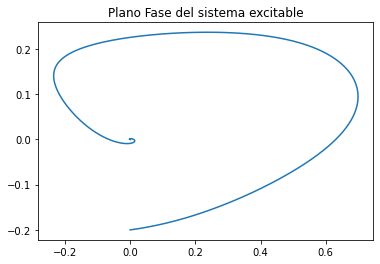

In [70]:
plot(sol[0],sol[1])
title('Plano Fase del sistema excitable')

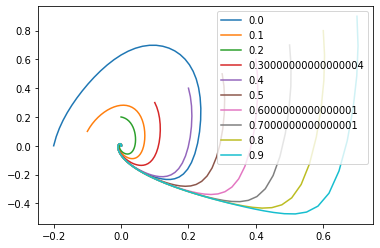

In [71]:
for j in arange(0,1,0.1):
    plot(odeint(F,[0+j,-0.2+j],linspace(-1, 1000, 3000)).T[1],odeint(F,[0+j,-0.2+j],linspace(-1, 1000, 3000)).T[0],label=j)
legend()

## Visualización de las ecuaciones de Hodgkin-Huxley

In [72]:
random.seed(1000)

In [73]:
tmin=0.
tmax=50.
##conductancias##
gk=36.
gNa=120.
gL=0.3
Cm=1.
Vk=-12.
VNa=115.
VL=10.61

T=linspace(tmin,tmax,10000)


In [74]:
def alpha_n(Vm):
    return (0.01 * (10.0 - Vm)) / (exp(1.0 - (0.1 * Vm)) - 1.0)

def beta_n(Vm):
    return 0.125 * exp(-Vm / 80.0)

In [75]:
def alpha_m(Vm):
    return (0.1 * (25.0 - Vm)) / (exp(2.5 - (0.1 * Vm)) - 1.0)

def beta_m(Vm):
    return 4.0 * exp(-Vm / 18.0)

def alpha_h(Vm):
    return 0.07 * exp(-Vm / 20.0)

def beta_h(Vm):
    return 1.0 / (exp(3.0 - (0.1 * Vm)) + 1.0)
  

In [76]:
def n_inf(Vm=0.0):
    return alpha_n(Vm) / (alpha_n(Vm) + beta_n(Vm))

def m_inf(Vm=0.0):
    return alpha_m(Vm) / (alpha_m(Vm) + beta_m(Vm))

def h_inf(Vm=0.0):
    return alpha_h(Vm) / (alpha_h(Vm) + beta_h(Vm))
  

In [77]:
def Id(t):
    if 0.0 < t < 1.0:
        return 150.0
    elif 10.0 < t < 11.0:
        return 50.0
    return 0.0

In [87]:
def HH(y, t0):
    dy = zeros((4,))
    
    Vm = y[0]
    n = y[1]
    m = y[2]
    h = y[3]
    
    # dVm/dt
    GK = (gk / Cm) * power(n, 4.0)
    GNa = (gNa / Cm) * power(m, 3.0) * h
    GL = gL / Cm
    
    dy[0] = (Id(t0) / Cm) - (GK * (Vm - Vk)) - (GNa * (Vm - VNa)) - (GL * (Vm - VL))
    
    # dn/dt
    dy[1] = (alpha_n(Vm) * (1.0 - n)) - (beta_n(Vm) * n)
    
    # dm/dt
    dy[2] = (alpha_m(Vm) * (1.0 - m)) - (beta_m(Vm) * m)
    
    # dh/dt
    dy[3] = (alpha_h(Vm) * (1.0 - h)) - (beta_h(Vm) * h)
    
    return dy

In [88]:
Y = np.array([0.0, n_inf(), m_inf(), h_inf()])

In [89]:
Vy = odeint(HH, Y, T)

In [90]:
Vy

array([[0.        , 0.31767691, 0.05293249, 0.59612075],
       [0.74882803, 0.31768222, 0.05298164, 0.59611298],
       [1.49515446, 0.31769828, 0.0531281 , 0.59608935],
       ...,
       [0.01070619, 0.31777484, 0.05300598, 0.59603444],
       [0.01068395, 0.3177749 , 0.05300584, 0.59603427],
       [0.01066172, 0.31777496, 0.0530057 , 0.5960341 ]])

In [91]:
Idv = [Id(t) for t in T]

Text(0.5, 1.0, 'Estimulo')

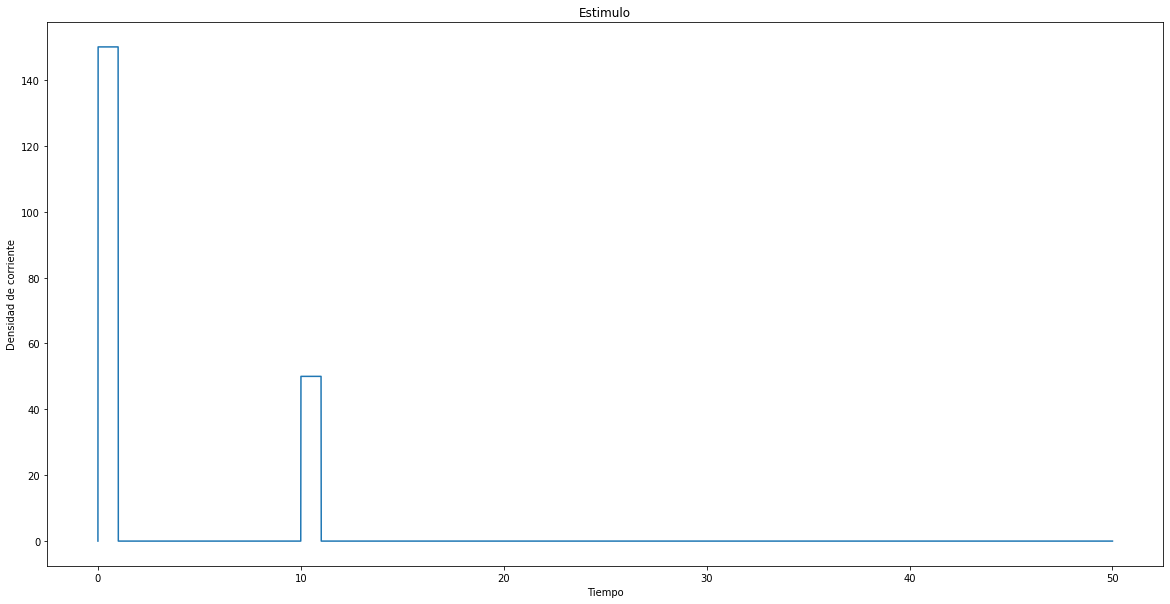

In [97]:
fig,ax=subplots(figsize=(20,10))
ax.plot(T,Idv)
ax.set_xlabel('Tiempo')
ax.set_ylabel('Densidad de corriente')
ax.set_title('Estimulo')

Text(0.5, 1.0, 'Potencial de neurona')

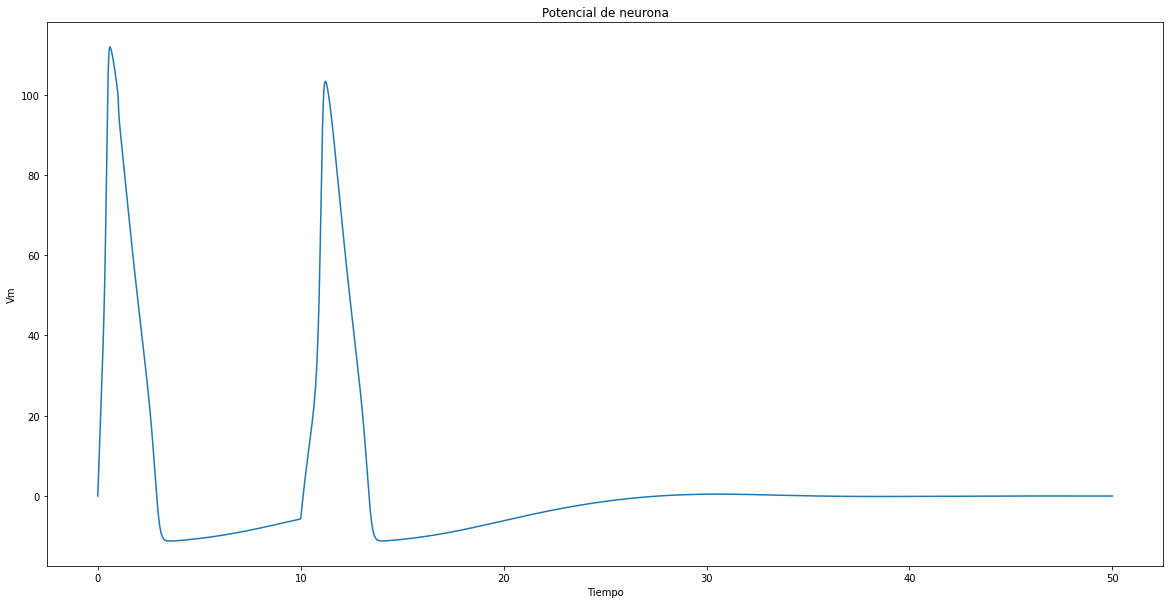

In [100]:
fig,ax=subplots(figsize=(20,10))
ax.plot(T,Vy[:,0])
ax.set_xlabel('Tiempo')
ax.set_ylabel('Vm')
ax.set_title('Potencial de neurona')

Text(0.5, 1.0, 'Ciclos límite')

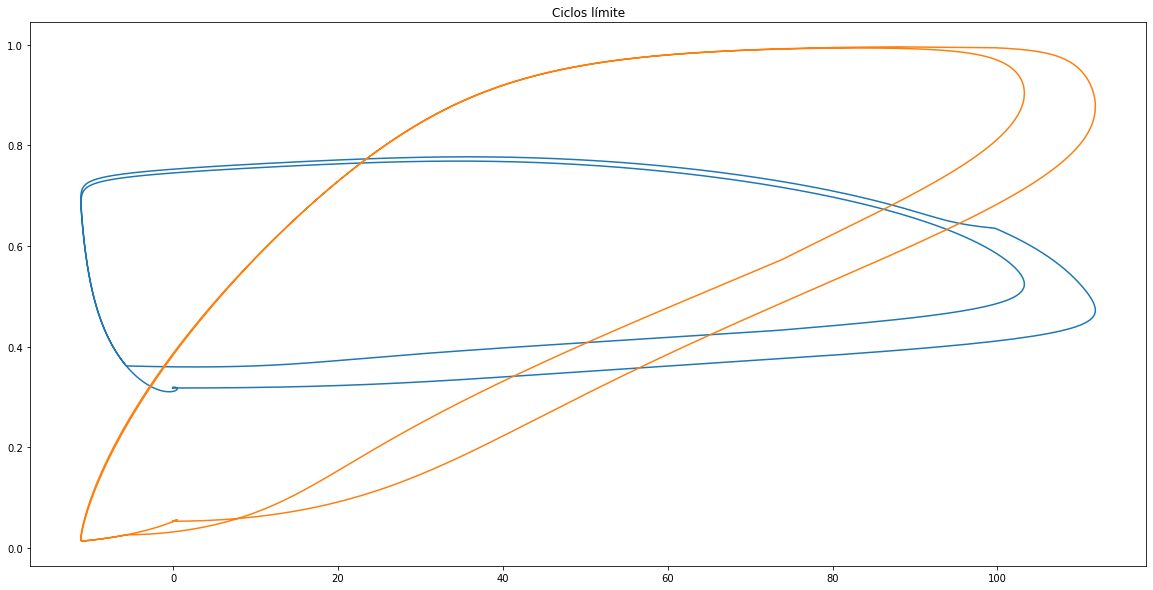

In [101]:
fig,ax=subplots(figsize=(20,10))
ax.plot(Vy[:,0],Vy[:,1],label='Vm-n')
ax.plot(Vy[:,0],Vy[:,2],label='Vm-m')
ax.set_title(r'Ciclos límite')

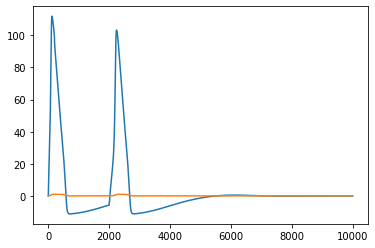

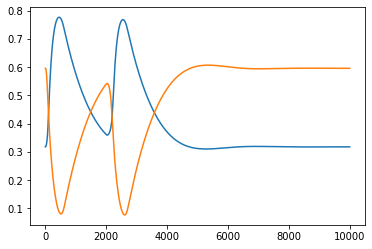

In [107]:
fig,ax=subplots()
ax.plot(Vy.T[0])
ax.plot(Vy.T[2])
fig,ax=subplots()
ax.plot(Vy.T[1])
ax.plot(Vy.T[3])